# Problem 2 c

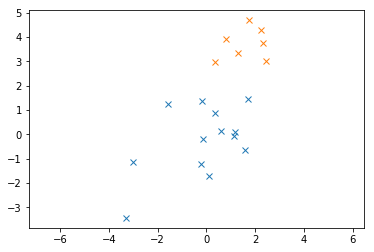

[-0.14085269 -0.24602766] [ 1.59556872  3.70745841]
[[ 2.56759483  1.15559678]
 [ 1.15559678  1.9501126 ]]
[[ 0.6632873   0.132737  ]
 [ 0.132737    0.42030941]]


In [18]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

%matplotlib inline

#random generate C1, C2.
mean_C1 = [0,0]
cov_C1 = [[2,1],[1,2]]
C1_train=np.random.multivariate_normal(mean_C1,cov_C1,(13))
y1_train=[[0]]*13

mean_C2 = [2,4]
cov_C2 = [[2,1.5],[1.5,2]]
C2_train=np.random.multivariate_normal(mean_C2,cov_C2,(7))
y2_train=[[1]]*7

X_train=np.vstack((C1_train,C2_train))
y_train=np.vstack((y1_train,y2_train))

C1_test=np.random.multivariate_normal(mean_C1,cov_C1,(6))
C2_test=np.random.multivariate_normal(mean_C2,cov_C2,(4))
X_test=np.vstack((C1_test,C2_test))
y1_test=[[0]]*6
y2_test=[[1]]*4
y_test=np.vstack((y1_test,y2_test))

plt.plot(C1_train[:,0], C1_train[:,1], 'x')
plt.plot(C2_train[:,0], C2_train[:,1], 'x')
plt.axis('equal')
plt.show()

mean_C1 = np.mean(C1_train,axis=0)
mean_C2 = np.mean(C2_train,axis=0)
co_C1 = np.cov(C1_train[:,0],C1_train[:,1])
co_C2 = np.cov(C2_train[:,0],C2_train[:,1])
P_C1 = 13/20
P_C2 = 7/20


print(mean_C1,mean_C2)
print(co_C1)
print(co_C2)

In [19]:
#Bayes Optimal decision boundary
#10*x1^2-22x1*x2+10x2^2 +48x1-120x2+192-21log(21/16)=0
import math
y_bayes_pred=[]
j=0
for i in range(10):
    y=10 *(X_test[i,0])**2 - 22*X_test[i,0]*X_test[i,1] + 10 * (X_test[i,1])**2 + 48*X_test[i,0]-120*X_test[i,1]+192-21*math.log(21/16)
    if(y>0):
        y_bayes_pred.append([0])
    else:
        y_bayes_pred.append([1])
    if(y_bayes_pred[i]!=y_test[i]):
        j=j+1
   
    
error_bayes=j/10
print('The optimal Bayes error rate is',error_bayes)


The optimal Bayes error rate is 0.0


# problem 2 d LDA 

In [20]:
import numpy.linalg as lg
import math

# LDA has the same covariance
co_lda=np.cov(X_train[:,0],X_train[:,1])

#discriminant functions : G1-lda,G2_lda
def G1_lda(Xdata):
    P1= np.dot(np.dot(Xdata ,lg.inv(co_lda)),np.mat(mean_C1).T)-0.5 * np.dot(np.dot( mean_C1 ,lg.inv(co_lda)),np.mat(mean_C1).T)  + math.log(0.6)
    return P1
def G2_lda(Xdata):
    P2= np.dot(np.dot(Xdata ,lg.inv(co_lda)),np.mat(mean_C2).T)-0.5 * np.dot(np.dot( mean_C1 ,lg.inv(co_lda)),np.mat(mean_C2).T)  + math.log(0.4)
    return P2

i=0
y_lda_pred=[]
for i in range(10):
    if (G1_lda(np.array(X_test[i:i+1])) > G2_lda(np.array(X_test[i:i+1]))):
        y_lda_pred.append([0])
    else:
        y_lda_pred.append([1])

i=0
j=0
for i in range(len(y_lda_pred)):
    if (y_lda_pred[i]!=y_test[i]):
        j=j+1
error_lda=j/10
print('The LDA error rate is:',error_lda)

The LDA error rate is: 0.3


# Problem 2 e QDA

In [22]:
# QDA has different covariances

#discriminant functions : G1-qda,G2_qda
def G1_qda(Xdata):
    P1= -0.5 *math.log(np.linalg.det(co_C1))-0.5 *np.dot(np.dot((Xdata-np.mat(mean_C1)),lg.inv(co_C1)),(Xdata-np.mat(mean_C1)).T)+math.log(0.6)
    return P1

def G2_qda(Xdata):
    P2= -0.5 *math.log(np.linalg.det(co_C2))-0.5 *np.dot(np.dot((Xdata-np.mat(mean_C2)),lg.inv(co_C2)),(Xdata-np.mat(mean_C2)).T)+math.log(0.4)
    return P2

i=0
y_qda_pred=[]
for i in range(10):
    if (G1_qda(np.array(X_test[i:i+1])) > G2_qda(np.array(X_test[i:i+1]))):
        y_qda_pred.append([0])
    else:
        y_qda_pred.append([1])

i=0
j=0
for i in range(len(y_qda_pred)):
    if (y_qda_pred[i]!=y_test[i]):
        j=j+1
error_qda=j/10
print('The QDA error rate is:',error_qda)

The QDA error rate is: 0.1


# Problem 2 f

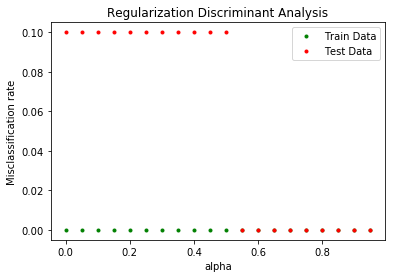

In [24]:
#alfa is the regularizor


def G1_regu(Xdata,j):
    P1= -0.5 *math.log(np.linalg.det(co_C1_regu[j]))-0.5 *np.dot(np.dot((Xdata-np.mat(mean_C1)),lg.inv(co_C1_regu[j])),(Xdata-np.mat(mean_C1)).T)+math.log(0.6)
    return P1

def G2_regu(Xdata,j):
    P2= -0.5 *math.log(np.linalg.det(co_C2_regu[j]))-0.5 *np.dot(np.dot((Xdata-np.mat(mean_C2)),lg.inv(co_C2_regu[j])),(Xdata-np.mat(mean_C2)).T)+math.log(0.4)
    return P2

alfa = np.arange(0,1,0.05)
co_C1_regu = []
co_C2_regu = []
error_train = []
error_test = []
index = 0

for a in alfa:
    co_C1_regu.append( alfa[index] * co_C1 +(1-alfa[index])*co_lda)
    co_C2_regu.append( alfa[index] * co_C1 +(1-alfa[index])*co_lda)


    j=0
    k=0
    y_regu_pred_train=[]
    y_regu_pred_test=[]
    for i in range(20):
        if (G1_regu(np.array(X_train[i:i+1]),index) > G2_regu(np.array(X_train[i:i+1]),index)):
            y_regu_pred_train.append([0])
        else:
            y_regu_pred_train.append([1])
        if (y_regu_pred_train[i]!=y_train[i]):
            j=j+1                

    for i in range(10):
        if (G1_regu(np.array(X_test[i:i+1]),index) > G2_regu(np.array(X_test[i:i+1]),index)):
            y_regu_pred_test.append([0])
        else:
            y_regu_pred_test.append([1])
        if (y_regu_pred_test[i]!=y_test[i]):
            k=k+1 

    index=index+1
    
    error_train.append(j/20)
    error_test.append(k/10)



plt.plot(alfa, error_train,'g.',label='Train Data')
plt.plot(alfa, error_test,'r.',label = 'Test Data')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Misclassification rate')
plt.title('Regularization Discriminant Analysis')
plt.axis('tight')
plt.show()

#print(error_test)

When using the train data, the misclassification rate is always zero. It indicates that the if the model learns the data before, it can successfully do the classification. In contrast, when using the test data, the misclassification is a little higher when alpha is small but becomes lower as the alpha increase. If there are more data in the test set, we can see this trend more clearly. Since the covariances of dataset C1 and C2 are not the same, QDA is better in this case, when the regularized discriminant count for more QDA function weight, there is less error.